In [2]:
# Perco dépendante

# Regarder l'évolution de pc en fonction des dimensions

# Parler du cas (trivial) de la dimension 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

def create_grid(height, width, probability, dependant=False, p_prime=0.5):
    """
    Crée une grille de sites (nœuds) avec une probabilité donnée, 
    éventuellement dépendante de l'état de la case au-dessus.
    """
    grid = np.random.rand(height, width) < probability
    
    if dependant:
        for i in range(1,height):
            for j in range(width):
                # Garder l'état de la case au-dessus avec une probabilité p_prime
                if np.random.rand() < p_prime :
                    grid[i, j] = grid[i - 1, j]
                else :
                    grid[i, j] = not grid[i - 1, j]
                    
    return grid


def simulate_liquid_flow(grid, allow_diagonal=False):
    """
    Simule l'écoulement d'un liquide depuis le haut de la grille.
    """
    filled_cells = np.zeros_like(grid)
    max_height_reached = 0
    
    stack = []  # Pile pour le parcours en profondeur itératif
    
    for j in range(grid.shape[1]):
        if grid[0, j] == 1:
            stack.append((0, j))
    
    while stack:
        i, j = stack.pop()
        
        if i < 0 or i >= grid.shape[0] or j < 0 or j >= grid.shape[1] or grid[i, j] == 0 or filled_cells[i, j] == 1:
            continue
        
        filled_cells[i, j] = 1
        max_height_reached = max(max_height_reached, i)
        
        # Ajouter les voisins à la pile
        stack.append((i - 1, j))
        stack.append((i + 1, j))
        stack.append((i, j - 1))
        stack.append((i, j + 1))
        
        if allow_diagonal:
            stack.append((i - 1, j - 1))
            stack.append((i - 1, j + 1))
            stack.append((i + 1, j - 1))
            stack.append((i + 1, j + 1))
    
    return filled_cells, max_height_reached + 1


def visualize_liquid_flow(grid, filled_cells, height):
    """
    Visualise l'écoulement du liquide sur la grille donnée.
    """
    plt.figure(figsize=(14, 14))

    plt.subplot(121)
    plt.imshow(grid, cmap='binary', interpolation='none')
    plt.title('Initial Grid')

    plt.subplot(122)
    plt.imshow(filled_cells, cmap='Blues', interpolation='none')
    plt.title('Liquid Flow')
    plt.xlabel(f'Height Reached: {height}')
    plt.show()

def find_connected_components(grid):
    """
    Trouve et calcule les tailles des composantes connexes dans la grille.
    """
    labels, num_features = label(grid)
    component_sizes = np.bincount(labels.ravel())
    component_sizes[0] = 0
    
    if len(component_sizes) > 1:
        max_component_size = np.max(component_sizes)
        avg_component_size = np.mean(component_sizes[1:])
    else:
        max_component_size = 0
        avg_component_size = 0
    
    return max_component_size, avg_component_size

def colorize_connected_components(grid):
    """
    Colorie les différentes composantes connexes dans la grille.
    """
    # Étiquetage des composantes connexes
    labeled_grid, num_features = label(grid)
    
    # Génération d'une carte de couleurs aléatoires pour les composantes connexes
    colors = np.random.rand(num_features + 1, 3)  # +1 pour inclure le fond
    colored_grid = np.zeros((grid.shape[0], grid.shape[1], 3))  # Initialisation d'un tableau 3D pour les couleurs
    
    # Coloration des cellules en fonction de l'étiquette de la composante connexe
    for label_id in range(1, num_features + 1):
        colored_grid[labeled_grid == label_id] = colors[label_id]

    return colored_grid

def main(height, width, probability, allow_diagonal=False, dependant=False, p_prime=0.5):
    """
    Exécute la simulation principale et affiche les résultats ainsi que les graphes initial et final avec et sans couleurs.
    """
    # Créer la grille initiale
    grid = create_grid(height, width, probability, dependant=dependant, p_prime=p_prime)
    
    # Inverser la grille pour que les cases ouvertes soient blanches
    inverted_grid = 1 - grid
    
    # Afficher la grille initiale sans couleurs
    plt.figure(figsize=(15, 15))
    plt.subplot(131)
    plt.imshow(inverted_grid, cmap='binary')
    plt.title('Initial Grid')
    plt.axis('off')
    
    # Simuler l'écoulement du liquide
    filled_cells, height_reached = simulate_liquid_flow(grid, allow_diagonal)
    
    # Calculer la proportion de cases remplies par le liquide
    filled_percentage = np.sum(filled_cells) / (height * width)
    
    # Trouver et afficher la taille de la plus grande composante connexe
    max_component_size, avg_component_size = find_connected_components(filled_cells)
    print(f"Height Reached: {height_reached}")
    print(f"Percentage of Grid Filled: {filled_percentage:.2f}")
    print(f"Size of Largest Connected Component: {max_component_size}")
    print(f"Average Size of Connected Components: {avg_component_size:.2f}")
    
    # Afficher la grille finale sans couleurs
    plt.subplot(132)
    plt.imshow(filled_cells, cmap='Blues', vmin=0, vmax=1)
    plt.title('Final Grid')
    plt.axis('off')
    
    # Afficher la grille finale avec les composantes connexes colorées
    plt.subplot(133)
    colored_grid = colorize_connected_components(filled_cells)
    plt.imshow(colored_grid)
    plt.title('Composantes connexes lors de la percolation')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


Height Reached: 1000
Percentage of Grid Filled: 0.51
Size of Largest Connected Component: 503100
Average Size of Connected Components: 4723.44


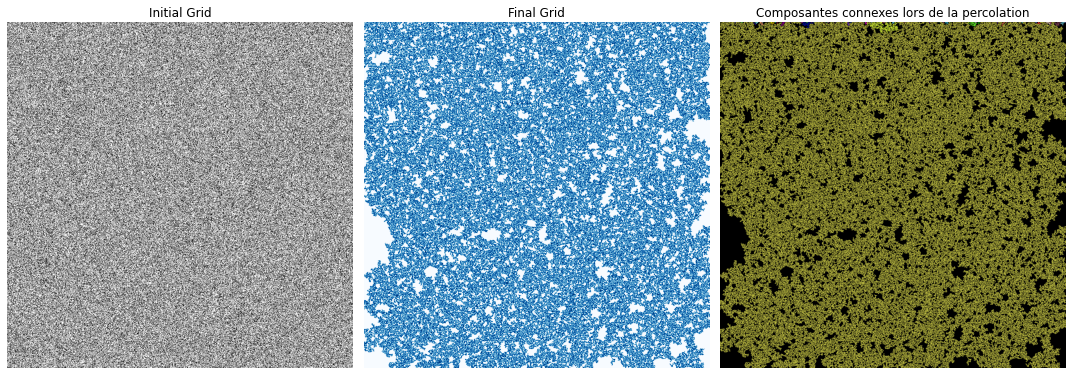

In [5]:
if __name__ == "__main__":
    height = 1000  # Hauteur de la grille
    width = 1000  # Largeur de la grille
    probability = 0.61  # Probabilité de présence initiale de liquide
    allow_diagonal = False  # Paramètre pour autoriser le mouvement diagonal
    dependant = False
    p_prime=0.7 
    main(height, width, probability, allow_diagonal,dependant,p_prime)

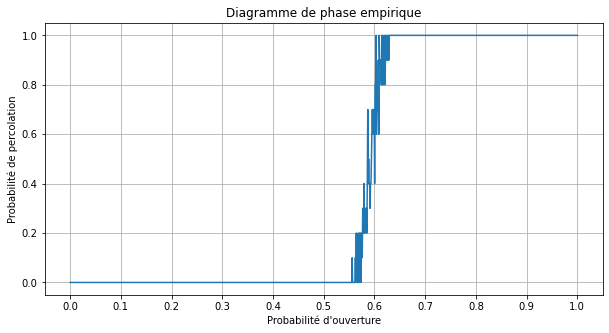

In [6]:
def percolation_probability(open_probability, num_trials=10, grid_size=50, allow_diagonal=False):
    """
    Calcule la probabilité de percolation en fonction de la probabilité qu'une case soit ouverte.
    """
    percolation_count = 0
    
    for _ in range(num_trials):
        grid = np.random.rand(grid_size, grid_size) < open_probability
        filled_cells, _ = simulate_liquid_flow(grid, allow_diagonal)
        
        if np.any(filled_cells[-1]):
            percolation_count += 1
    
    return percolation_count / num_trials

def plot_percolation_probability(num_trials=5, grid_size=100, allow_diagonal=False):
    """
    Trace le graphe de la probabilité de percolation en fonction de la probabilité qu'une case soit ouverte.
    """
    linspace1=np.linspace(0, 0.5,5)
    linspace2=np.linspace(0.5,0.68, 200)
    linspace4=np.linspace(0.68, 1, 5)
    linspace3 = np.concatenate((linspace1, linspace2))
    open_probabilities = concatenated_linspace = np.concatenate((linspace3, linspace4))  # Probabilités d'ouverture de 0 à 1 avec un pas de 0.01
    percolation_probabilities = []
    
    for open_probability in open_probabilities:
        percolation_prob = percolation_probability(open_probability, num_trials, grid_size, allow_diagonal)
        percolation_probabilities.append(percolation_prob)
    plt.figure(figsize=(10, 5))
    plt.plot(open_probabilities, percolation_probabilities)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title('Diagramme de phase empirique')
    plt.xlabel('Probabilité d\'ouverture')
    plt.ylabel('Probabilité de percolation')
    plt.grid(True)
    plt.show()
# Exemple d'utilisation :
plot_percolation_probability(10,100)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


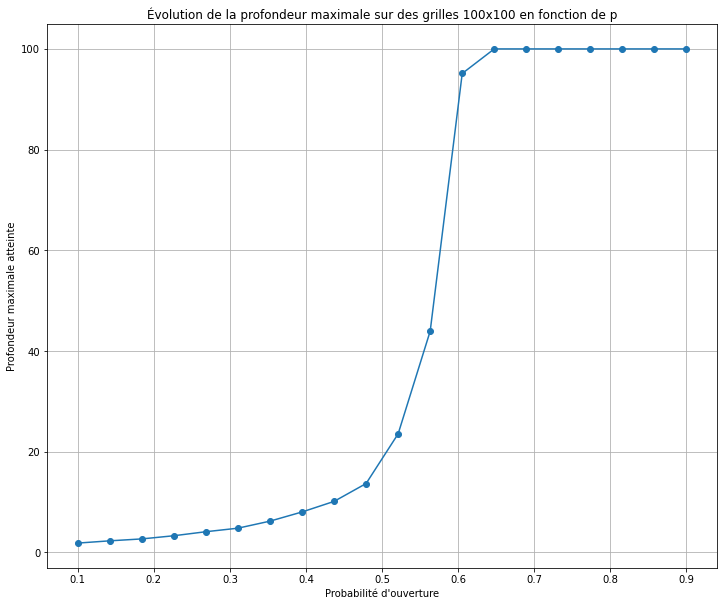

In [11]:
def plot_depth_vs_probability(height, width, probabilities, num_simulations=100, allow_diagonal=False):
    """
    Trace la profondeur maximale atteinte en fonction de la probabilité.
    """
    max_depths = []
    for probability in probabilities:
        max_depth_sum = 0
        for _ in range(num_simulations):
            grid = create_grid(height, width, probability)
            filled_cells, height_reached = simulate_liquid_flow(grid, allow_diagonal)
            max_depth_sum += height_reached
        max_depth_avg = max_depth_sum / num_simulations
        max_depths.append(max_depth_avg)
    
    plt.figure(figsize=(12, 10))  # Définir la taille du graphique
    plt.plot(probabilities, max_depths, marker='o')
    plt.xlabel('Probabilité d\'ouverture')
    plt.ylabel('Profondeur maximale atteinte')
    plt.title('Évolution de la profondeur maximale sur des grilles 100x100 en fonction de p')
    plt.grid(True)
    plt.show()

# Exemple d'utilisation :
height = 100  # Hauteur de la grille
width = 100   # Largeur de la grille
probabilities = np.linspace(0.1, 0.9, 20)  # Probabilités à tester
plot_depth_vs_probability(height, width, probabilities)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


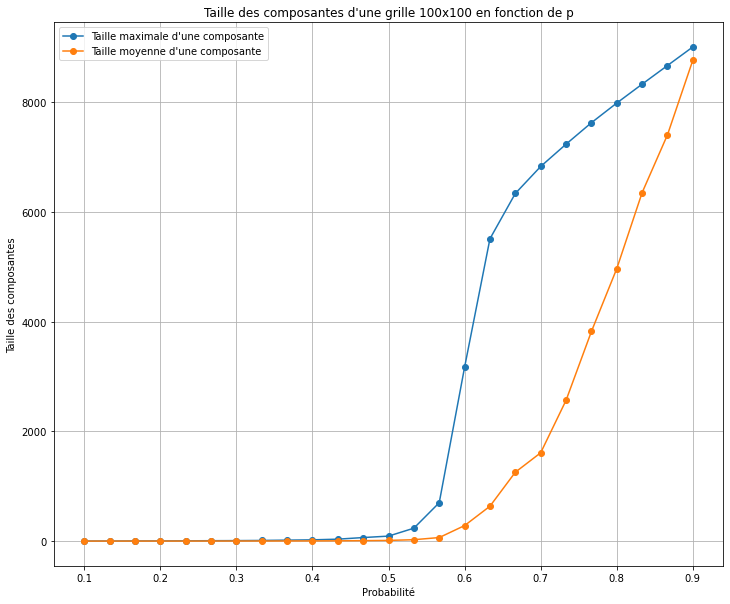

In [16]:
def plot_component_sizes_vs_probability(height, width, probabilities, num_simulations=100, allow_diagonal=False):
    """
    Trace la taille de la plus grande composante connexe et la taille moyenne d'une composante connexe
    en fonction de la probabilité.
    """
    max_component_sizes = []
    avg_component_sizes = []
    
    for probability in probabilities:
        max_size_sum = 0
        avg_size_sum = 0
        for _ in range(num_simulations):
            grid = create_grid(height, width, probability)
            filled_cells, _ = simulate_liquid_flow(grid, allow_diagonal)
            max_component_size, avg_component_size = find_connected_components(filled_cells)
            max_size_sum += max_component_size
            avg_size_sum += avg_component_size
        
        max_component_avg = max_size_sum / num_simulations
        avg_component_avg = avg_size_sum / num_simulations
        
        max_component_sizes.append(max_component_avg)
        avg_component_sizes.append(avg_component_avg)
    
    plt.figure(figsize=(12, 10))  # Définir la taille du graphique
    plt.plot(probabilities, max_component_sizes, marker='o', label='Taille maximale d\'une composante')
    plt.plot(probabilities, avg_component_sizes, marker='o', label='Taille moyenne d\'une composante')
    plt.xlabel('Probabilité')
    plt.ylabel('Taille des composantes')
    plt.title('Taille des composantes d\'une grille 100x100 en fonction de p')
    plt.grid(True)
    plt.legend()
    plt.show()

# Exemple d'utilisation :
height = 100  # Hauteur de la grille
width = 100   # Largeur de la grille
probabilities = np.linspace(0.1, 0.9, 25)  # Probabilités à tester
plot_component_sizes_vs_probability(height, width, probabilities)


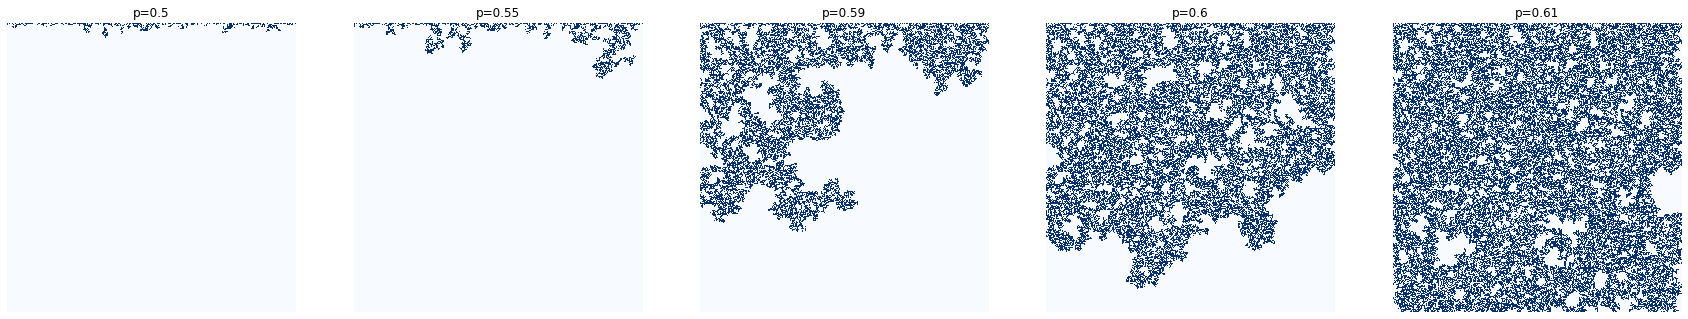

In [366]:
def evolve_graph(g1, p):
    """
    Évolue un graphe g1 vers un nouveau graphe g2 où chaque cellule ouverte dans g1 reste ouverte dans g2,
    sinon elle a une probabilité p d'être ouverte dans g2.
    """
    # Créer un nouveau graphe avec les mêmes dimensions que g1
    g2 = np.zeros_like(g1)
    
    # Parcourir toutes les cellules de g1
    for i in range(g1.shape[0]):
        for j in range(g1.shape[1]):
            # Si la cellule est ouverte dans g1, elle reste ouverte dans g2
            if g1[i, j] == 1:
                g2[i, j] = 1
            # Sinon, avec une probabilité p, la cellule est ouverte dans g2
            elif np.random.rand() < p:
                g2[i, j] = 1
    
    return g2


def visualize_evolution(probabilities, grid_size=500, allow_diagonal=False):
    """
    Affiche l'évolution de plusieurs graphes générés avec différentes probabilités.
    """
    num_graphs = len(probabilities)
    
    plt.figure(figsize=(6 * num_graphs, 6))
    
    for i, p in enumerate(probabilities, start=1):
        # Générer le graphe avec la probabilité p
        if i == 1:
            grid = np.random.rand(grid_size, grid_size) < p
        else:
            grid = evolve_graph(prev_grid, (p - prev_p) / (1 - prev_p))
        prev_grid = grid
        prev_p = p
        filled_cells, _ = simulate_liquid_flow(grid, allow_diagonal)
        
        # Afficher le graphe
        plt.subplot(1, num_graphs, i)
        plt.imshow(filled_cells, cmap='Blues', interpolation='none')
        plt.title(f'p={p}')
        plt.axis('off')
    
    plt.show()

# Exemple d'utilisation :
visualize_evolution([0.5,0.55,0.59,0.6,0.61])
